In [23]:
import numpy as np
#from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt

import persim

from pyRipser import *

In [149]:
points1 = []
points2 = []
points3 = []

f = open('topology/comps1.txt')
line = f.readline().strip()
while(line):
    #print(line.split(",")[0], line.split(",")[1])
    points1.append([float(line.split(",")[0]), float(line.split(",")[1])])
    line = f.readline().strip()
f.close()

f = open('topology/comps2.txt')
line = f.readline().strip()
while(line):
    #print(line.split(",")[0], line.split(",")[1])
    points2.append([float(line.split(",")[0]), float(line.split(",")[1])])
    line = f.readline().strip()
f.close()

f = open('topology/comps3.txt')
line = f.readline().strip()
while(line):
    #print(line.split(",")[0], line.split(",")[1])
    points3.append([float(line.split(",")[0]), float(line.split(",")[1])])
    line = f.readline().strip()
f.close()

In [150]:
print(np.array(points1).shape)
print(np.array(points2).shape)
print(np.array(points3).shape)

(30, 2)
(30, 2)
(30, 2)


In [158]:
diagrams1 = ripser(np.array(points1))['dgms']
diagrams2 = ripser(np.array(points2))['dgms']
diagrams3 = ripser(np.array(points3))['dgms']

plot_diagrams(diagrams1, show=True, ax=plt.subplot(131))
plot_diagrams(diagrams2, show=True, ax=plt.subplot(132))
plot_diagrams(diagrams3, show=True, ax=plt.subplot(133))

2.441387


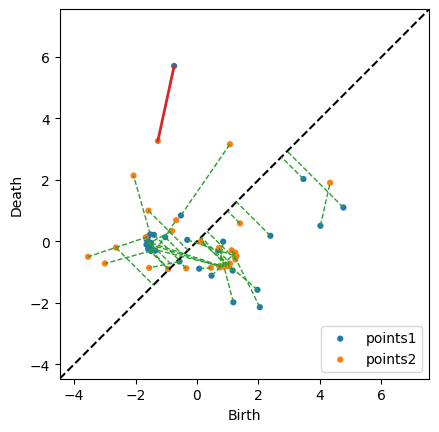

In [152]:
distance_bottleneck, matching = persim.bottleneck(np.array(points1), np.array(points2), matching=True)
print(distance_bottleneck)

persim.bottleneck_matching(np.array(points1), np.array(points2), matching, labels=['points1', 'points2'])
plt.show()

1.1341076


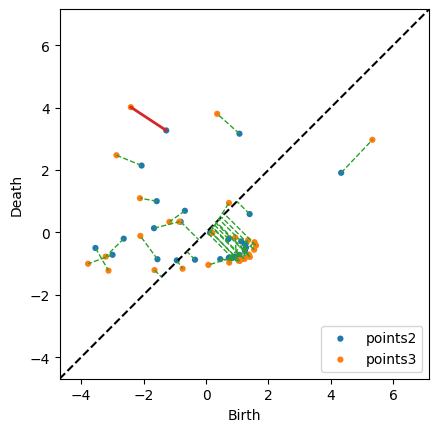

In [153]:
distance_bottleneck, matching = persim.bottleneck(np.array(points2), np.array(points3), matching=True)
print(distance_bottleneck)

persim.bottleneck_matching(np.array(points2), np.array(points3), matching, labels=['points2', 'points3'])
plt.show()

2.244662


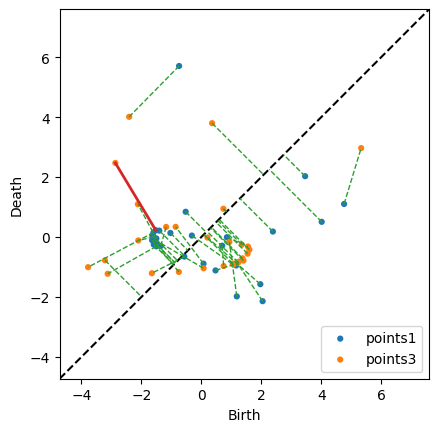

In [154]:
distance_bottleneck, matching = persim.bottleneck(np.array(points1), np.array(points3), matching=True)
print(distance_bottleneck)

persim.bottleneck_matching(np.array(points1), np.array(points3), matching, labels=['points1', 'points3'])
plt.show()

<br><br><br>

## Embeddings with original dimension

In [3]:
def distancia(p1,p2):
    #import numpy as np
    return np.sqrt(np.sum(pow((p1-p2),2)))

In [4]:
import numpy as np

a = np.array([[3,4], [5,6], [7,8]])
print(a[0], a[1])
print(a[0] - a[1])
distancia(a[0],a[1])

[3 4] [5 6]
[-2 -2]


2.8284271247461903

In [5]:
e0 = np.load("../../pruebas/ais-segmentation/emb_0.npy")
e1 = np.load("../../pruebas/ais-segmentation/emb_1.npy")
e2 = np.load("../../pruebas/ais-segmentation/emb_2.npy")

In [6]:
print(e0.shape, e1.shape, e2.shape)

(30, 1024) (30, 1024) (30, 1024)


In [7]:
e0.shape

distancia(e0[0],e0[20])

1.546303

In [31]:
todasfilas = []
filas = []
fila = []

for i in range(len(e0)):
    for j in range(len(e0)):
        fila.append(distancia(e0[i], e0[j]))
    filas.append(fila)
    fila = []
todasfilas.append(filas)

filas = []
for i in range(len(e1)):
    for j in range(len(e1)):
        fila.append(distancia(e1[i], e1[j]))
    filas.append(fila)
    fila = []
todasfilas.append(filas)

filas = []
for i in range(len(e2)):
    for j in range(len(e2)):
        fila.append(distancia(e2[i], e2[j]))
    filas.append(fila)
    fila = []
todasfilas.append(filas)

In [32]:
m = np.array(todasfilas)

ripser = Ripser('.././ripser', dim=1)
pers_diags1 = ripser.compute_pd(m[0])
pers_diags2 = ripser.compute_pd(m[1])
pers_diags3 = ripser.compute_pd(m[2])

Serializing to disk:   0%|          | 0/1 [00:00<?, ?it/s]

Running Ripser:   0%|          | 0/1 [00:00<?, ?it/s]

Serializing to disk:   0%|          | 0/1 [00:00<?, ?it/s]

Running Ripser:   0%|          | 0/1 [00:00<?, ?it/s]

Serializing to disk:   0%|          | 0/1 [00:00<?, ?it/s]

Running Ripser:   0%|          | 0/1 [00:00<?, ?it/s]

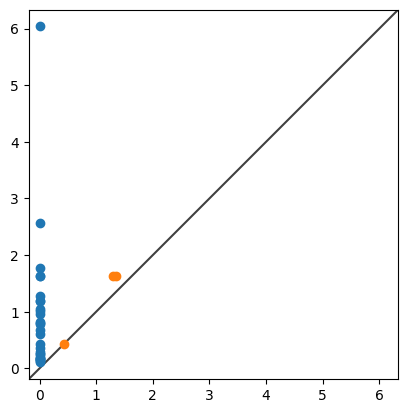

In [33]:
pers_diags1[0].show_diagram()

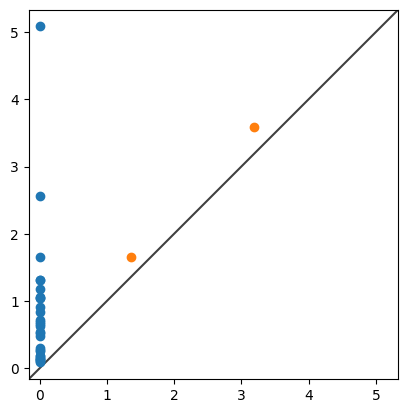

In [34]:
pers_diags2[0].show_diagram()

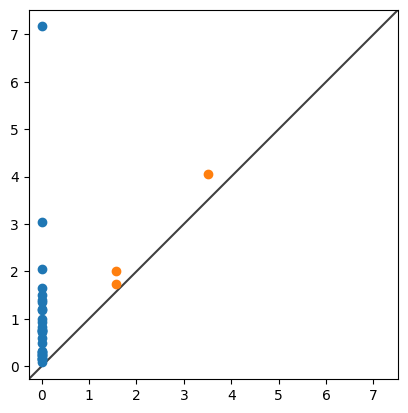

In [35]:
pers_diags3[0].show_diagram()

In [48]:
distance_bottleneck, matching = persim.bottleneck(np.array(m[0]), np.array(m[1]), matching=True)
print(distance_bottleneck)
print(matching, "\n")

distance_bottleneck, matching = persim.bottleneck(np.array(m[1]), np.array(m[2]), matching=True)
print(distance_bottleneck)
print(matching)
#persim.bottleneck_matching(np.array(m[0]), np.array(m[1]), matching)
#plt.show()

0.5802857875823975
[[ 0.          0.          0.33270633]
 [ 1.         -1.         -0.92789251]
 [ 2.         -1.         -0.87596214]
 [ 3.         26.          0.18387246]
 [ 4.         27.          0.55559444]
 [ 5.         -1.         -0.73680532]
 [ 6.         -1.         -0.6083619 ]
 [ 7.          8.          0.39749539]
 [ 8.         -1.         -0.22295469]
 [ 9.         -1.          0.20445222]
 [10.          9.          0.38552547]
 [11.         15.          0.30505431]
 [12.         11.          0.07871509]
 [13.         -1.          0.28426838]
 [14.         16.          0.09502697]
 [15.         13.          0.24384189]
 [16.         -1.          0.30065018]
 [17.         12.          0.30726457]
 [18.         -1.          0.441315  ]
 [19.         20.          0.28065336]
 [20.         -1.          0.50404453]
 [21.         14.          0.45655096]
 [22.         10.          0.43110943]
 [23.         -1.          0.06385493]
 [24.         24.          0.5137974 ]
 [25. 